# Synaptic-modulation Network  
actfun = max0x  
weight function = cosine

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt

import HD_utils.plot as sp
import HD_utils.IO as io
from HD_utils.gridsearch_configs import configs
from HD_utils.plot import *

# Load Data

In [2]:
config = configs[0]
net_sta = io.load_gridsearch_results('stationary', config)
net_move = io.load_gridsearch_results('moving', config)

In [3]:
net_move.velocity.max()

7.964740232363286

# Stationary Case

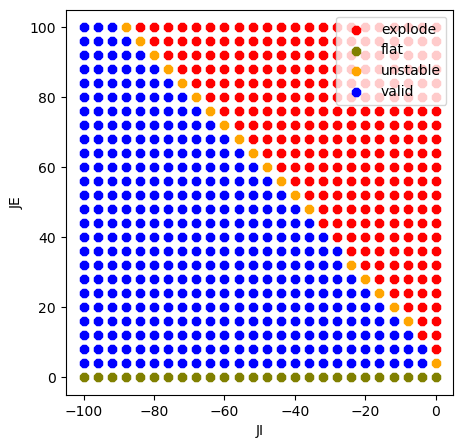

In [4]:
sp.plot_2_par_on_type(net_sta.eval, net_sta.par)

## Examples

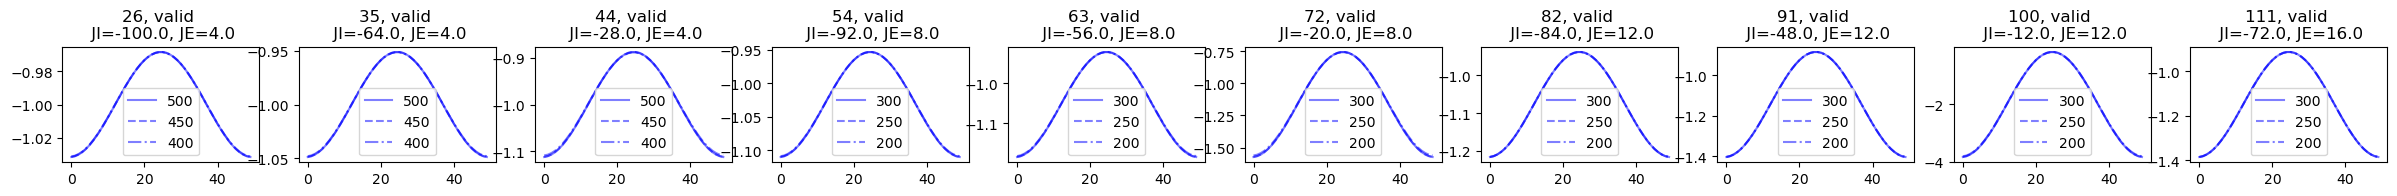

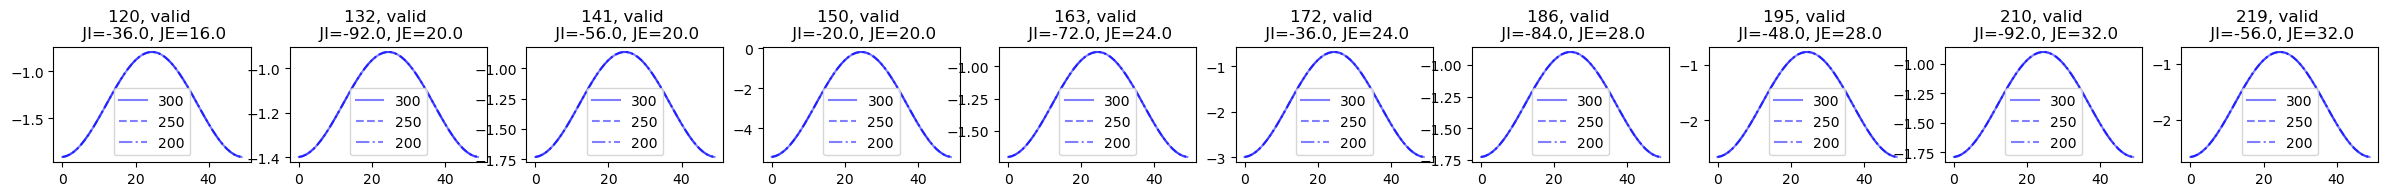

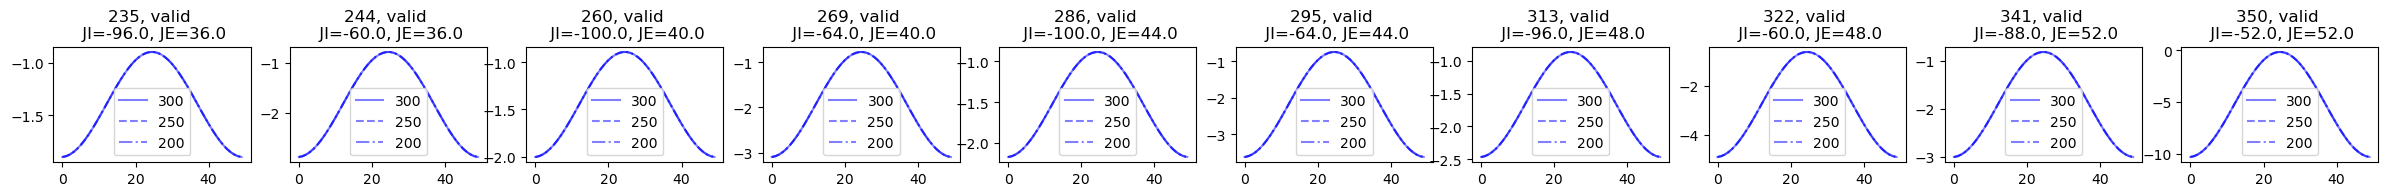

In [5]:
index_vis = net_sta.valid_id[::9]
sp.sample_stable_shape_1ring(index_vis, net_sta.eval, net_sta.par, net_sta.activity, net_sta.time, varnames=['JI', 'JE'])

# Moving case

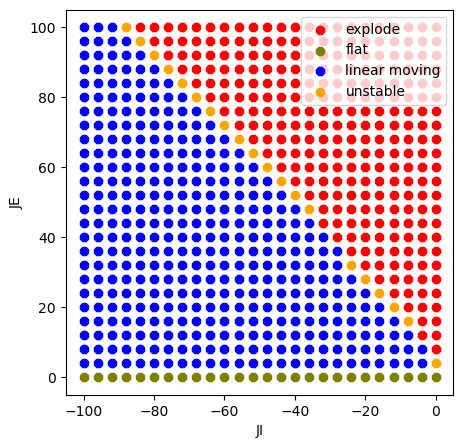

In [6]:
sp.plot_2_par_on_type(net_move.eval_sum, net_sta.par)

## Examine Theoretical Predictions

In [7]:
net_move.calculate_linear_range(net_sta, config)
index_shape_mismatch, dev_shape_ratios, if_match = cal_shape_mismatch_loop(net_move.activity, net_move.linear_id, config.zeroid)
print(index_shape_mismatch)
print(f'{len(index_shape_mismatch)/len(net_move.linear_id) * 100:.2f} % = Percent of shape not match')
print(f'{np.max(dev_shape_ratios):.3f} = Max[(acv dif) / (max one neighboring acv dif)]')
print(f'{np.mean(dev_shape_ratios):.3f} = Mean[(acv dif) / (max one neighboring acv dif)]')
print(f'{np.std(dev_shape_ratios):.3f} = SD[(acv dif) / (max one neighboring acv dif)]')

[]
0.00 % = Percent of shape not match
0.480 = Max[(acv dif) / (max one neighboring acv dif)]
0.065 = Mean[(acv dif) / (max one neighboring acv dif)]
0.107 = SD[(acv dif) / (max one neighboring acv dif)]


[]
0.00 % = Percent of height not match
0.024 = Max[(height change) / (ptp)]
0.003 = Mean[(height change) / (ptp)]
0.005 = SD[(height change) / (ptp)]


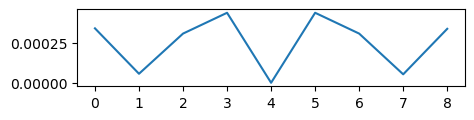

In [8]:
index_height_mismatch, dev_heightratios, if_match = cal_height_dif_loop(net_move.activity, net_move.linear_id, config.actfun, config.zeroid, b=config.get_barray())
print(index_height_mismatch)
print(f'{len(index_height_mismatch)/len(net_move.linear_id) * 100:.2f} % = Percent of height not match')
print(f'{np.nanmax(dev_heightratios):.3f} = Max[(height change) / (ptp)]')
print(f'{np.nanmean(dev_heightratios):.3f} = Mean[(height change) / (ptp)]')
print(f'{np.nanstd(dev_heightratios):.3f} = SD[(height change) / (ptp)]')

fig = plt.figure(figsize=(5,1))
plt.plot(dev_heightratios[net_move.linear_id][0])
plt.show()

# Examples

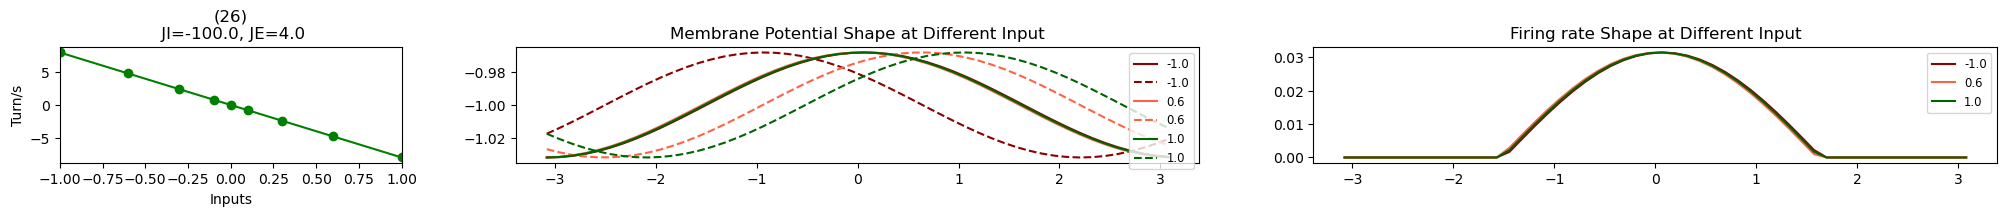

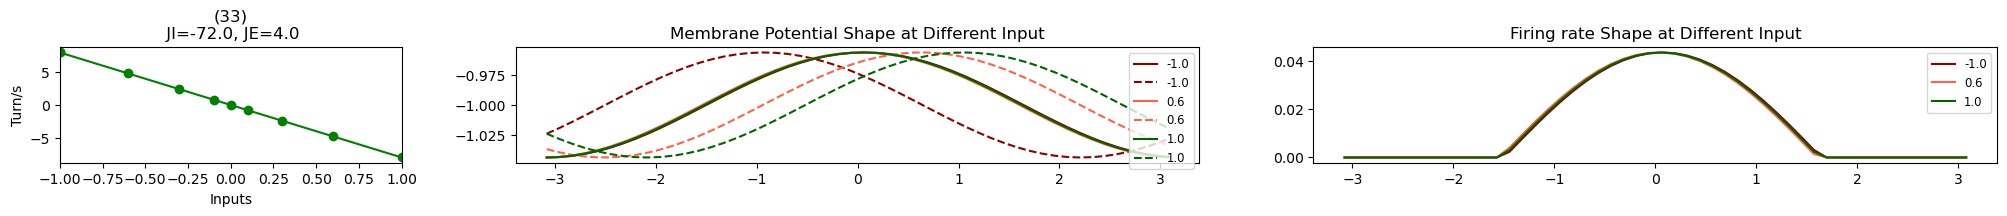

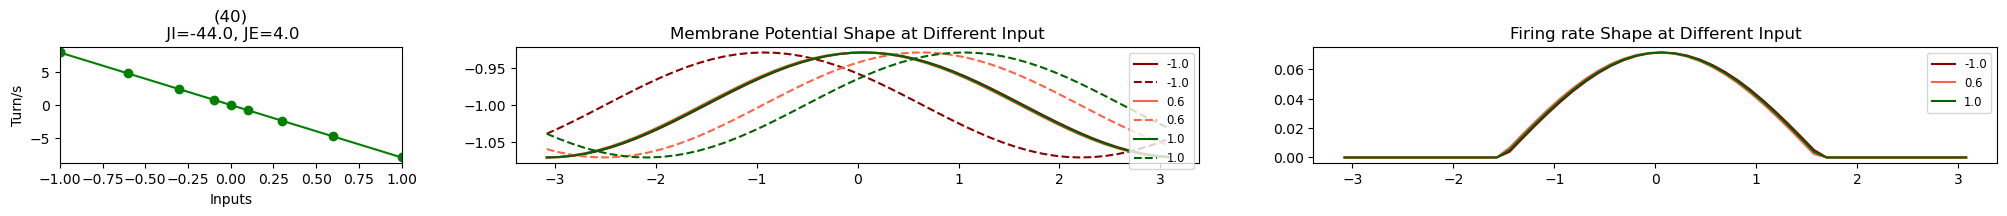

In [9]:
net_move.calculate_linear_range(net_sta, config)
index_vis = net_move.linear_id[::7][:3]
plot_overview_25_s1ring_simple(config.inputs, index_vis, net_move.activity, net_sta.par, net_move.eval, net_move.velocity, 
                               config.theta_range, config.b0, figsize=(25,1.5), compare_ids=(0,-2, -1), actfun=config.actfun)